In [1]:
%matplotlib inline
import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from scipy.stats import mode

from data_generate_non_cs import data_generate_non_cs
from distance2 import distance2
from iVAT import iVAT
from VAT import VAT

In [2]:
total_num_of_points = 2000
num_clusters = 4


odds_matrix = np.ones((1, 4), dtype=int)

data_matrix_with_labels, mean_matrix, var_matrix = data_generate_non_cs(
    num_clusters, odds_matrix, total_num_of_points)

colors_1 = np.array(cm.get_cmap().colors)
colors = np.zeros((num_clusters, 3))

for i in range(1, num_clusters+1):
    colors[i-1, :] = colors_1[int(
        np.ceil(max(colors_1.shape)*i/num_clusters)-1), :]


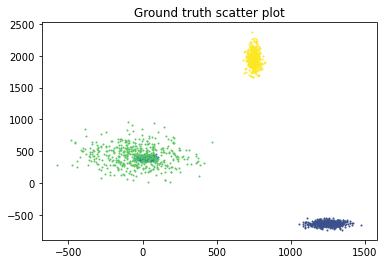

In [3]:
p1 = plt.figure(1)
plt.title(label="Ground truth scatter plot")
for i in range(1, num_clusters+1):
    cluster_index = np.array(np.where(data_matrix_with_labels[:, -1] == i))
    plt.plot(data_matrix_with_labels[cluster_index, 0],
             data_matrix_with_labels[cluster_index, 1], marker='o', color=colors[i-1, :], markersize=1)

In [4]:
##############  VAT Algorithm ####################

x = data_matrix_with_labels
n, p = x.shape

tic = time.time()

pi_true = x[:, -1]
x = x[:, 0:-1]

rs = distance2(x, x)
rv, C, I, RI, cut = VAT(rs)
RiV, RV, reordering_mat = iVAT(rv, 1)

toc = time.time()
print("Time elapsed : ", str(toc-tic))

x1, y1 = cut.shape
cut = cut.reshape((x1*y1,))
cuts, ind = -np.sort(-cut), np.argsort(-cut)
ind = np.sort(ind[0:num_clusters-1])

Pi = np.zeros((n,))
Pi[I[0:ind[1]]] = 1
Pi[I[ind[-1]:-1]] = num_clusters 

for k in range(1, num_clusters-1):
    Pi[I[ind[k-1]:ind[k]-1]] = k

D:\SMOP\New folder (2)\MattoPy\VAT_iVAT\VAT.py:23: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  J = np.delete(J, J == J[j])
D:\SMOP\New folder (2)\MattoPy\VAT_iVAT\VAT.py:34: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  J = np.delete(J, J == J[j])


Time elapsed :  20.114733457565308


Text(0.5, 1.0, 'iVAT dissimilarity matrix image')

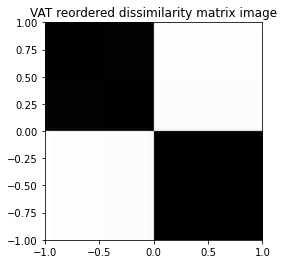

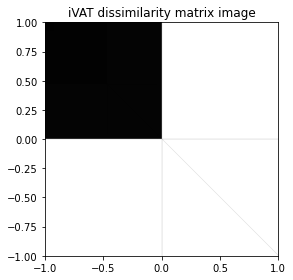

In [5]:
p2 = plt.figure(2)
plt.rcParams["figure.autolayout"] = True
plt.imshow(rv, cmap=cm.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.title(label="VAT reordered dissimilarity matrix image")


p3 = plt.figure(3)
plt.rcParams["figure.autolayout"] = True
plt.imshow(RiV, cmap=cm.get_cmap('gray'), extent=[-1, 1, -1, 1])
plt.title(label="iVAT dissimilarity matrix image")


Text(0.5, 1.0, 'MST of the dataset')

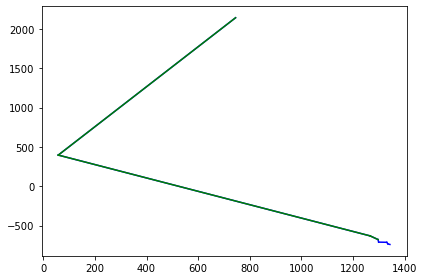

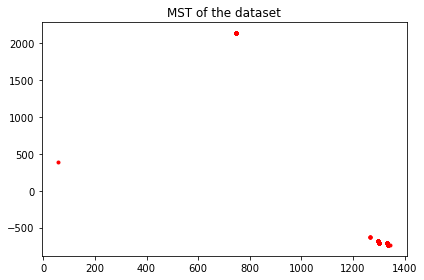

In [6]:
p4 = plt.figure(4)
for i in range(0, np.max(I.shape)-1):
    x_cor = np.hstack((x[I[i], 0], x[I[C[i]], 0]))
    y_cor = np.hstack((x[I[i], 1], x[I[C[i]], 1]))
    plt.plot(x_cor, y_cor, 'b')

for i in range(np.max(ind.shape)):
    x_cor = np.hstack((x[I[ind[i]], 0], x[I[C[ind[i]]], 0]))
    y_cor = np.hstack((x[I[ind[i]], 1], x[I[C[ind[i]]], 1]))
    plt.plot(x_cor, y_cor, 'g')

p5 = plt.figure(5)
plt.plot(x[I, 0], x[I, 1], 'r.')
plt.title(label="MST of the dataset")